In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 # <h1 style='background:#bc5090; border:0; color:black'><center>SEISMIC ANALYSIS</center></h1> 
 
 **<span style="color:#bc5090;">The Goal of this Notebook is to study the relationship between worldwide earthquake distribution and tectonic plate boundaries. </span>**

**<span style="color:#bc5090;">Note : This notebook is a bit heavy so may take a littel time to loadfull. Hold tight. </span>**

**<span style="color:#bc5090;">Cheers!</span>**
 
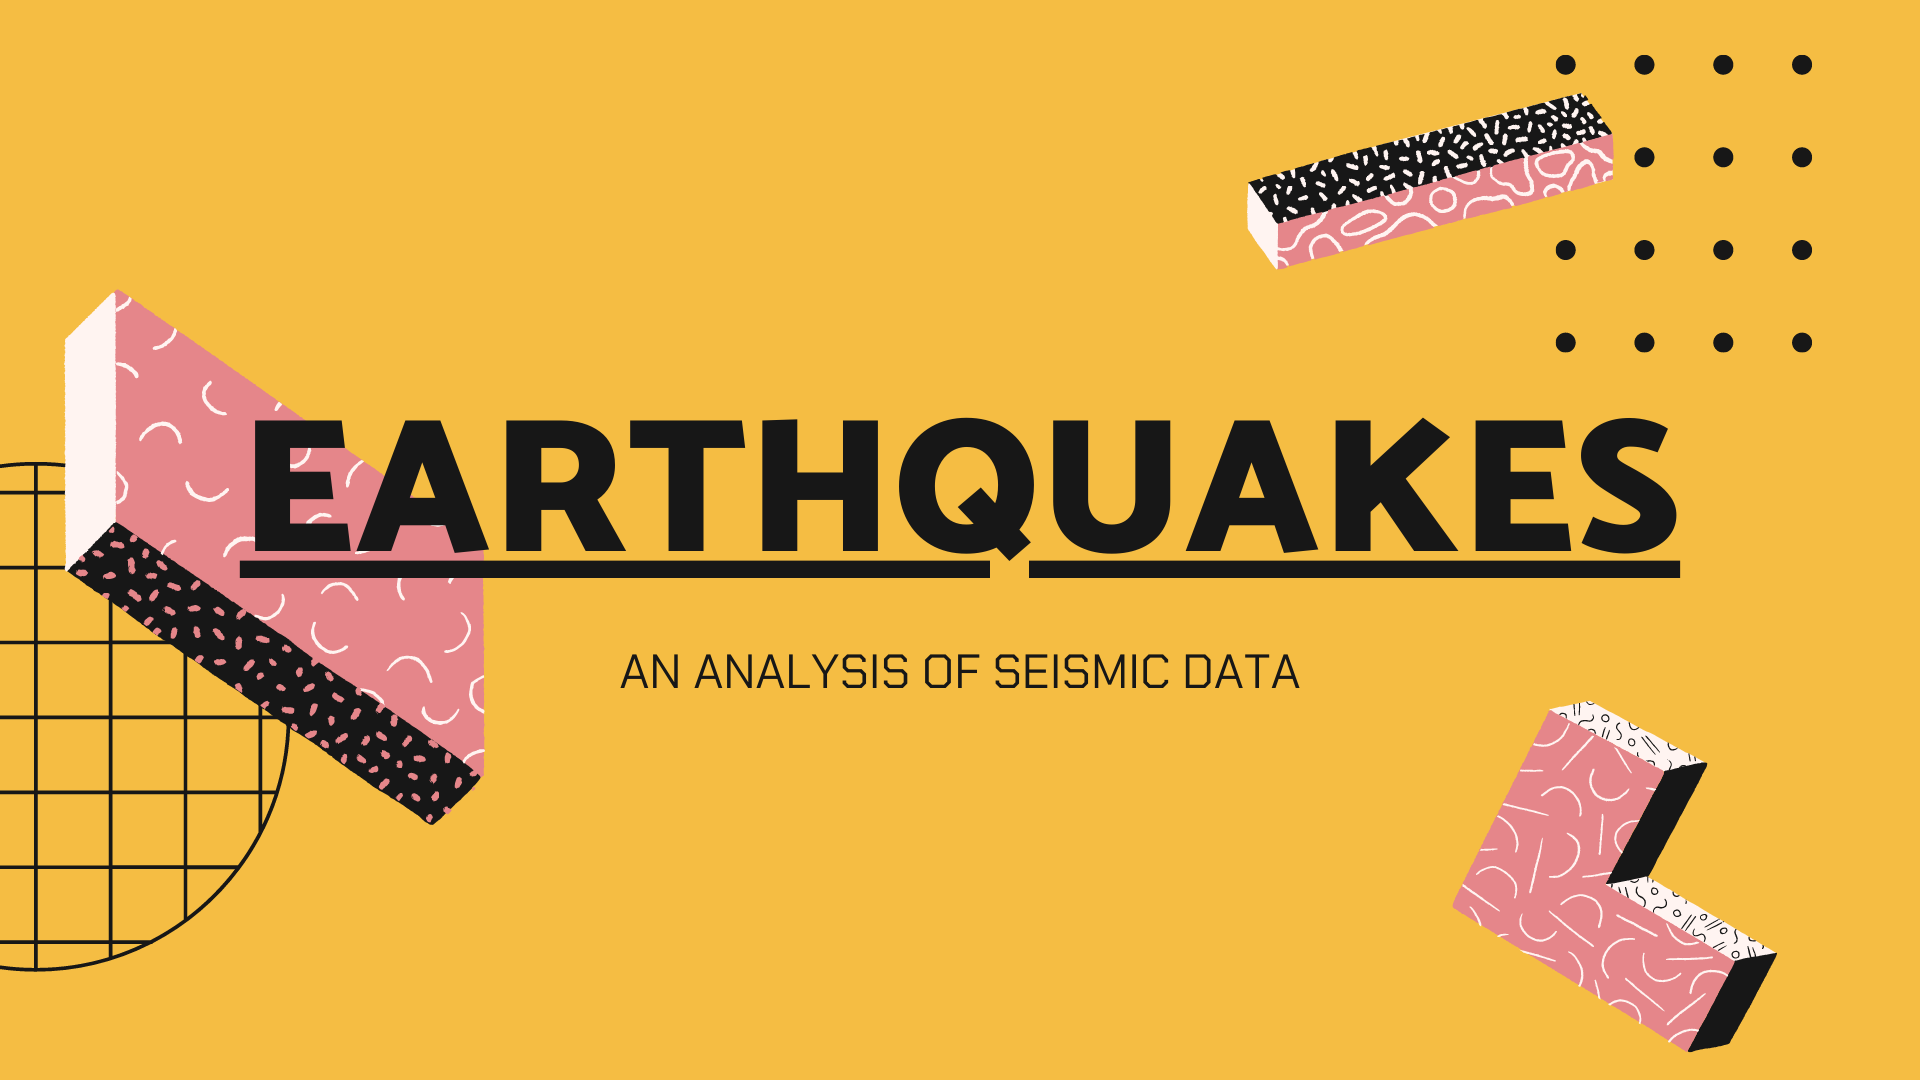

On March 27, 1964, at 5:36 pm an earthquake of magnitude 9.2 occurred in Alaska. The depth of Alaska's (64) earthquake was  25 km beneath the surface. The earthquake lasted approximately 4.5 minutes. It was followed by multiple Tsunamis recorded as high as 67 meters. It still holds the title of the most powerful recorded earthquake in the history of the United States. It is also the second-largest earthquake ever recorded, next to the M9.5 earthquake in Chile in 1960. This catastrophic event was a  great leap forward to the modern age of earthquake science. Most of what we know about earthquakes can be traced back to the geological research done after the great Alaskan earthquake. 



 # **<span style="color:#346888;">TABLE OF CONTENTS</span>**

**IMPORTING LIBRARIES**

**LOADING DATA**

**DATA PREPROCESSING**

**DATA ANALYSIS**

**GEOSPATIAL ANALYSIS AND VISUALIZATION**

**CONCLUSIONS**

 # **<span style="color:#346888;">IMPORTING LIBRARIES</span>**

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth
from folium.plugins import HeatMap
import datetime

np.random.seed(0)

 # **<span style="color:#346888;">LOADING DATA</span>**

In [ ]:
#loading data
#eathquake data
data = pd.read_csv("../input/earthquake-database/database.csv")
#dropping columns with missing values
missing_values_columns = [col for col in data.columns
                     if data[col].isnull().any()]
data = data.drop(missing_values_columns, axis=1)
data.head()

In [ ]:
#loading data for tectonic plate boundaries
tectonic_plates = pd.read_csv("../input/tectonic-plate-boundaries/all.csv" )
tectonic_plates.head()

It is not merely a coincidence that our data on earthquakes start in 1965.  The great Alaskan quake is the turning point on the studies of: "What causes the earthquakes?". The geologists concluded that the seismic events show a strong linkage to the landscape of Plate Tectonics. So our second dataset is that of the geospatial locations of Tectonic Plate Boundaries. 

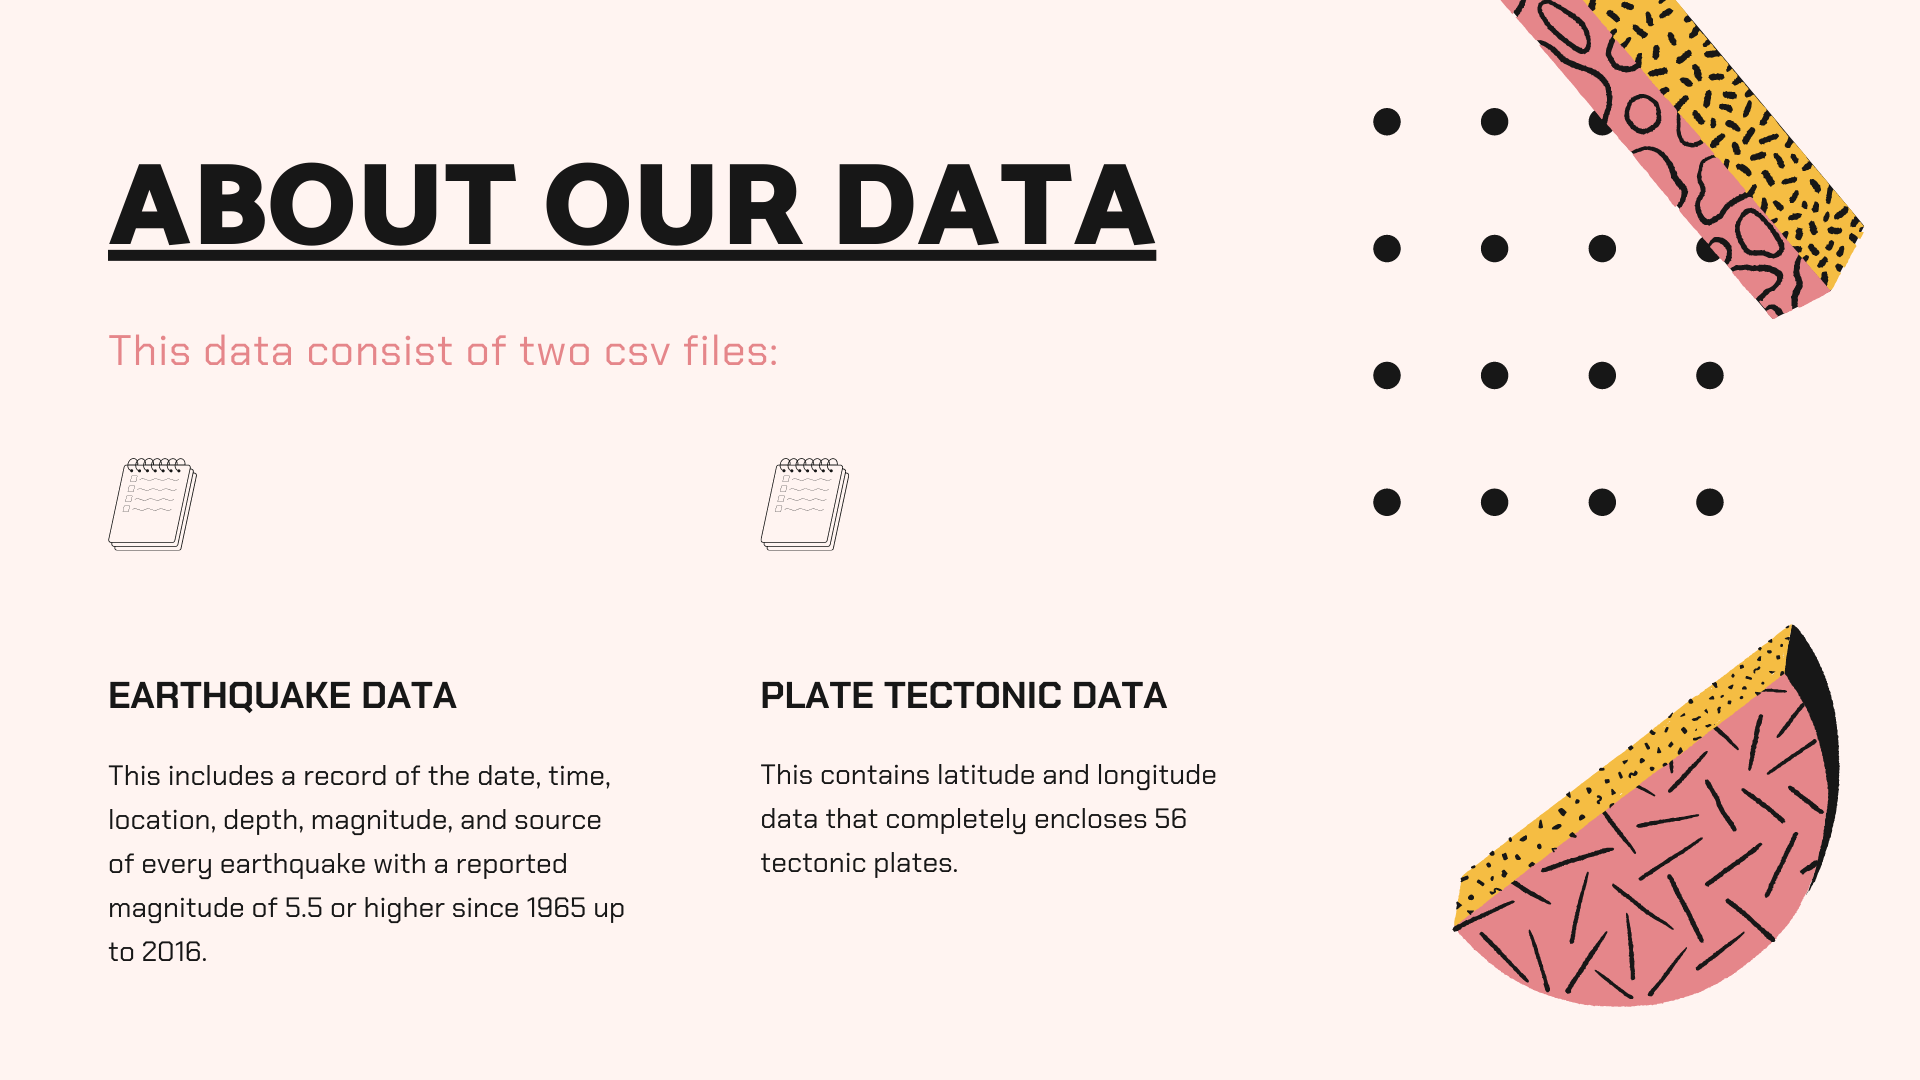

# **<span style="color:#346888;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Parsing Date: Parsed Date to dtype datetime64(ns)
* Parsing Time: Parsed Time to dtype timedelta64
* Adding Attributes: 

    1. "Date_Time"- This column contains parsed values of datetime combined.
    2. "Days"-This column contains parsed days of week

In [ ]:
#Parsing datetime
#exploring the length of date objects
lengths = data["Date"].str.len()
lengths.value_counts()

In [ ]:
#having a look at the fishy datapoints
wrongdates = np.where([lengths == 24])[1]
print("Fishy dates:", wrongdates)
data.loc[wrongdates]

In [ ]:
#fixing the wrong dates and changing the datatype from numpy object to datetime64[ns]
data.loc[3378, "Date"] = "02/23/1975"  
data.loc[7512, "Date"] = "04/28/1985"
data.loc[20650, "Date"] = "03/13/2011"
data['Date']= pd.to_datetime(data["Date"])
data.info()

In [ ]:
#We have time data too. Now that we are at it,lets parse it as well. 
#exploring the length of time objects
lengths = data["Time"].str.len()
lengths.value_counts()

In [ ]:
#Having a look at the fishy datapoints
wrongtime = np.where([lengths == 24])[1]
print("Fishy time:", wrongtime)
data.loc[wrongtime]

In [ ]:
#Ah! Is it deja vu or are those the same datapoints
#fixing the wrong time and changing the datatype from numpy object to timedelta64[ns]
data.loc[3378, "Time"] = "02:58:41"
data.loc[7512, "Time"] = "02:53:41"
data.loc[20650, "Time"] = "02:23:34"
data['Time']= pd.to_timedelta(data['Time'])
data.info()

In [ ]:
#I don't think there is any point in doing this step, but why not!
data["Date_Time"]=data["Date"] +data["Time"]

In [ ]:
#Now that we have Date, Time (and Date_Time) we totally should have Days of week too. I mean that's only fair. 
data["Days"]= data.Date.dt.strftime("%A")

In [ ]:
#Lets have a look at data
data.head()

In [ ]:
#Lets have a look
data.info()

# **<span style="color:#346888;">DATA ANALYSIS</span>**

We begin our analysis by plotting a line plot of magnitudes with dates. This showed a time series of various earthquakes on the planet from 1965 to 2016. Taking the first look at the plot we may conclude that there was a relatively high seismic activity from 1965 to early 1970s. 

In [ ]:
#plotting a lineplot with magnitudes with respectto dates
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=data['Date'].dt.year,y="Magnitude",data=data, color="#ffa600")
Time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
Time_series.set_ylabel("Magnitude", color="#58508d")
Time_series.set_xlabel("Date", color="#58508d")

However, Our data also includes earthquake caused by nuclear explosions, explosions and rockburst. In order to have a clear distinction about the seismic activities, we must rule out if this high magnitude events were due to other man-made causes. 
In the next plot, we examine that for further clarity. 

In [ ]:
#Plotting timeseries with respect to Type to geta better understanding
plt.figure(figsize=(12,8))
colours = ["#ffa600","#bc5090","#ff6361","#003f5c"]
Time_series_Type=sns.lineplot(x=data['Date'].dt.year,y="Magnitude",data=data,hue="Type", palette= colours)
Time_series_Type.set_title("Time Series Of Earthquakes Over Years (With Type)", color="#58508d")
Time_series_Type.set_ylabel("Magnitude", color="#58508d")
Time_series_Type.set_xlabel("Date", color="#58508d")

From the above plot, we may conclude that there were, indeed, relatively high magnitude events in the late 60s and early 70s. However, not all of those were due to seismic causes.Much of it was associate with other causes. The plot shows a peek in nuclear explosions and explosions in the 1970s. 

In the next section, we will see the distribution of earthquake on the days of the week. 

In [ ]:
#Evauating earthquake in terms of days of week
plt.figure(figsize=(12,8))
Days_of_week=sns.barplot(x=data['Days'],y="Magnitude",data=data, ci =None, hue ="Type",palette = colours)
Days_of_week.set_title("Distribution Of Earthquakes Intensity Over Days Of Week", color="#58508d")
Days_of_week.set_ylabel("Magnitude", color="#58508d")
Days_of_week.set_xlabel("Days Of Week", color="#58508d")

<span style="color:#003f5c;"> This is an interesting find as we may conclude that the gods of earthquakes work around the clock and don't even take weekends off. Or do they! Unless they work in shifts. Huh! </span>

**The depth of earthquakes and mean depth**

In [ ]:
#Plotting the depth of earthquake and mean depth

plt.figure(figsize=(12,8))
depth = data["Depth"].values
mean_D= data["Depth"].mean()
Depth_plot = sns.distplot(depth, color ="#003f5c")
Depth_plot.set_title("Depths of Earthquakes", color="#58508d")
Depth_plot.set_ylabel("Density", color="#58508d")
Depth_plot.set_xlabel("Depth", color="#58508d")

plt.axvline(mean_D,0,1, color="#58508d",linewidth=4,label="Mean")

**The magnitude of earthquakes and mean magnitute**

In [ ]:
#ploting the magnitude of earthquake and mean magnitute

plt.figure(figsize=(12,9))
strength = data["Magnitude"].values
mean_M= data["Magnitude"].mean()
Magnitude_plot = sns.distplot(strength, color ="#ffa600")
Magnitude_plot.set_title("Magnitudes of Earthquakes", color="#58508d")
Magnitude_plot.set_ylabel("Density", color="#58508d")
Magnitude_plot.set_xlabel("Magnitude", color="#58508d")

plt.axvline(mean_M,0,1, color="#58508d",linewidth=4,label="Mean")

# **<span style="color:#346888;">GEOSPATIAL ANALYSIS AND VISUALIZATION</span>**

Earth’s crust, the uppermost layer of earth, is extremely thin in comparison to the volume of the Earth compared to what lies below it. it has an uneven thickness of as little as 5 kilometres (at Hawaii ) to as thick as 70 kilometres. The crust is broken into large pieces called tectonic plates. It is speculated that the heat-driven convection currents of magma in the mantle of the earth makes these plates move 1.2 to 2 inches each year. this movement of plated explains many geological phenomena. It is believed to cause most earthquakes and volcanoes on earth. 

In the next section, we will assess if there is any correlation in the occurrence of earthquakes and tectonic plates. 

First of all, let's plot the boundaries of the tectonic plate on a map. Then we will examine if the plate boundaries hold any relation to the locations of the earthquakes in our data. 

**Tectonic plate boundaries on a Map**

In [ ]:
#Ploting the tectonic plate's boundaries 
tectonic = folium.Map(tiles="cartodbpositron", zoom_start=5)

plates = list(tectonic_plates["plate"].unique())
for plate in plates:
    plate_vals = tectonic_plates[tectonic_plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]], popup=plate, color="#58508d", fill=False, ).add_to(tectonic)

tectonic

**Tectonic plate boundaries along with the earthquake location on a Map**

In [ ]:
#Plottong the plates along with the earthquake
tectonic_quake = folium.Map(tiles="cartodbpositron", zoom_start=5)
gradient = {.33: "#7a5195", .66: "#ef5675", 1: "#ffa600"} 
plates = list(tectonic_plates["plate"].unique())
for plate in plates:
    plate_vals = tectonic_plates[tectonic_plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]], popup=plate, fill=False,  color="#58508d").add_to(tectonic_quake)
        HeatMap(data=data[["Latitude", "Longitude"]],hue="Magnitude",min_opacity=0.5,radius=1,gradient=gradient).add_to(tectonic_quake)
tectonic_quake

The plate boundaries do coincide with the earthquakes in our data. However, some of the data points are of the quakes are caused by other events (In column "Types"; namely, "NuclearExplosion", "Explosion"&"Rock Burst"). Let's plot onlt the Type-Earthquakes to see the difference. 

In [ ]:
# A edit in data to the eartquake type to only earthquake and dropping others as "Nuclear Explosion","Explosion" and "Rock Burst"
data_onlyquakes= data.set_index("Type") 
data_onlyquakes=data_onlyquakes.drop(["Nuclear Explosion","Explosion","Rock Burst"],axis=0)


**Tectonic plate boundaries along with the earthquake of "Type" "Earthquake" location on a Map**

In [ ]:
#plotting the the eartquake type to only earthquake

tectonic_quake = folium.Map(tiles="cartodbpositron", zoom_start=5)
plates = list(tectonic_plates["plate"].unique())
for plate in plates:
    plate_vals = tectonic_plates[tectonic_plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]], popup=plate, fill=False,  color="#58508d").add_to(tectonic_quake)
        HeatMap(data=data_onlyquakes[["Latitude", "Longitude"]], min_opacity=0.5,max_zoom=40,max_val=0.5,radius=1,gradient=gradient).add_to(tectonic_quake)

tectonic_quake

This shows that some of the earthquakes that lie away from the boundaries of the tectonic plates were, in fact, caused by events as; Nuclear, Explosion or Rock Burst. Majority of quakes are around the edge of the tectonic plates. This shows a clear visualisation of the relation between quakes and tectonic plates.

After establishing the relation of earthquakes with the plates, in the next section, we are going to examine if there is any association of tectonic plates and the magnitude or depth of quakes. 

We will assess the magnitude and depth one by one. Firstly, let's dive into the magnitudes 

For the Magnitude, we plot magnitudes in three ranges

1)Magnitude with values less than 5.9 

2)Magnitude with values less than 6.5

3)Magnitude with values more than 6.5

In [ ]:
# Create a base map with plate boundaries and deapth 
Mag_tectonics  = folium.Map(tiles="cartodbpositron", zoom_start=5)
gradient = {.33: "#628d82", .66: "#a3c5bf", 1: "#eafffd"} 
plates = list(tectonic_plates["plate"].unique())
for plate in plates:
    plate_vals = tectonic_plates[tectonic_plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]], fill=False,  color="#58508d").add_to(Mag_tectonics)
        
def colormag(val):
            if val < 5.9:
                return "#ffcf6a"
            elif val < 6.5:
                return "#fb8270"
            else:
                return "#bc5090"
            
for i in range(0,len(data)):
    folium.Circle(location=[data.iloc[i]["Latitude"], data.iloc[i]["Longitude"]],radius=2000, color=colormag(data.iloc[i]["Magnitude"])).add_to(Mag_tectonics)

#A bit of extra code to get legent 
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>

</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Magnitude Scale </div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#ffcf6a;opacity:1;'></span>values less than 5.9</li>
    <li><span style='background:#fb8270;opacity:1;'></span>values less than 6.5</li>
    <li><span style='background:#bc5090;opacity:1;'></span>values less than 6.5</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

Mag_tectonics.get_root().add_child(macro)

Mag_tectonics

We can see that the magnitude distribution of earthquakes does not hold any association with plate boundaries. There does not appear to be any pattern and the magnitude is randomly distributed. We may discard any relation of the magnitude of earthquakes with plate location. 

Next up is Depth:

For the Depth, we plot depth in three ranges

1)The Depth values less than 50 KM 

2)The Depth values less than 100 KM

3) The Depth values more than 100 km

In [ ]:
# Create a base map with plate boundaries and deapth 
Depth_tectonics  = folium.Map(tiles="cartodbpositron", zoom_start=5)
gradient = {.33: "#628d82", .66: "#a3c5bf", 1: "#eafffd"} 
plates = list(tectonic_plates["plate"].unique())
for plate in plates:
    plate_vals = tectonic_plates[tectonic_plates["plate"] == plate]
    lats = plate_vals["lat"].values
    lons = plate_vals["lon"].values
    points = list(zip(lats, lons))
    indexes = [None] + [i + 1 for i, x in enumerate(points) if i < len(points) - 1 and abs(x[1] - points[i + 1][1]) > 300] + [None]
    for i in range(len(indexes) - 1):
        folium.vector_layers.PolyLine(points[indexes[i]:indexes[i+1]],fill=False,  color="#58508d").add_to(Depth_tectonics)
        
def colordepth(val):
            if val < 50:
                return "#ffcf6a"
            elif val < 100:
                return "#fb8270"
            else:
                return "#bc5090"
            
for i in range(0,len(data)):
    folium.Circle(location=[data.iloc[i]["Latitude"], data.iloc[i]["Longitude"]],radius=2000, color=colordepth(data.iloc[i]["Depth"])).add_to(Depth_tectonics)

#A bit of extra code to get legent 
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>

</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Depth Scale </div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:#ffcf6a;opacity:1;'></span>Depth less than 50</li>
    <li><span style='background:#fb8270;opacity:1;'></span>Depth less than 100</li>
    <li><span style='background:#bc5090;opacity:1;'></span>Depth more than 100</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

Depth_tectonics.get_root().add_child(macro)

Depth_tectonics

There seems to be an association in the depth of earthquake and the distance it occurred from plate boundaries. A pattern is clearly visible on taking a close look.  It does appear that earthquakes closer to plate boundaries are shallower and earthquakes away are deeper.  

# <h1 style='background:#bc5090; border:0; color:black'><center>CONCLUSIONS</center></h1> 
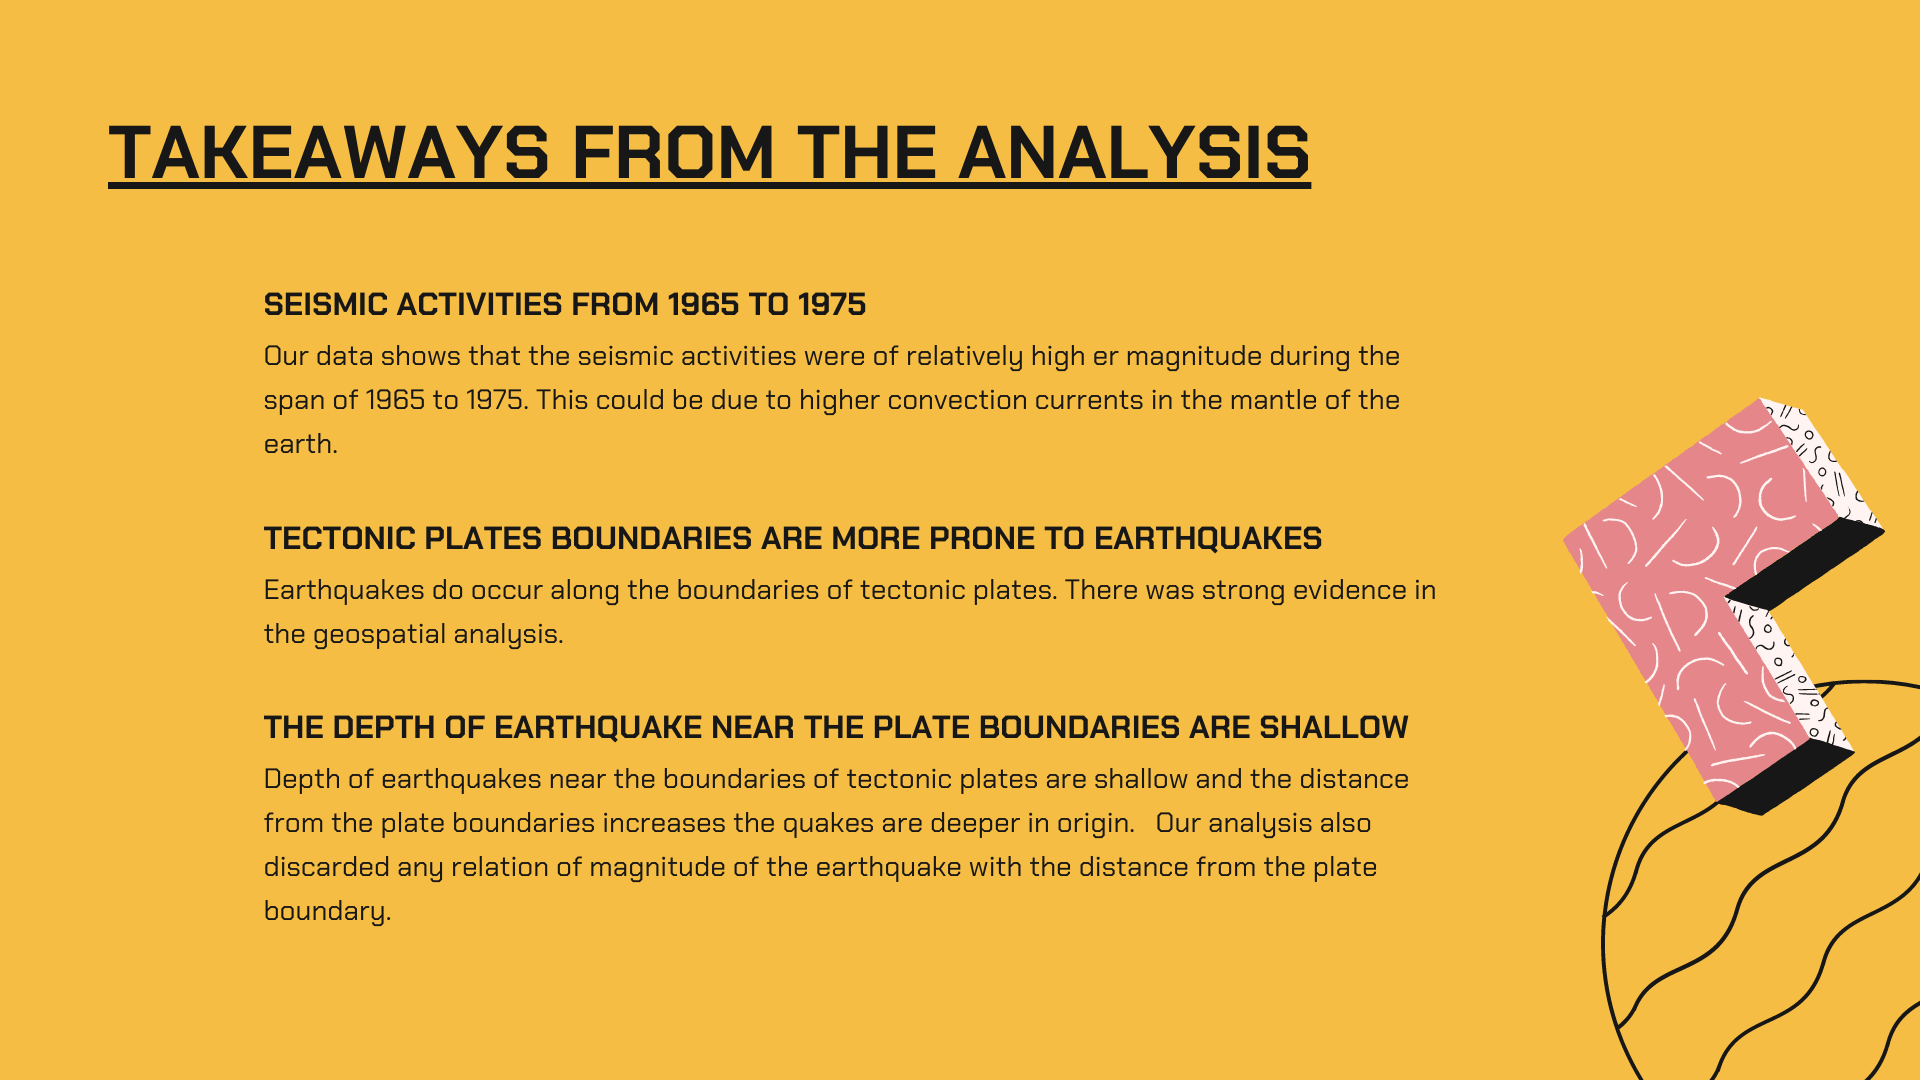

**<span style="color:#346888;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:#346888;"> If you have any suggestions or questions, I am all ears!</span>**

**<span style="color:#346888;">Best Wishes!</span>**

# <h1 style='background:#bc5090; border:0; color:black'><center>END</center></h1> 